In [1]:
#import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("All_rolls_wildemount.csv")
df.head()

,Episode,Time,Character,Type of Roll,Total Value,Natural Value,Crit?,Damage Dealt,# Kills,Notes
0,C2E001,0:35:40,Fjord,Perception,Nat20,20,NaN,NaN,NaN,NaN
1,C2E001,0:39:22,Jester,Perception,22,19,NaN,NaN,NaN,NaN
2,C2E001,0:39:30,Beau,Perception,19,16,NaN,NaN,NaN,NaN
3,C2E001,0:43:04,Beau,Insight,13,8,NaN,NaN,NaN,NaN
4,C2E001,0:50:37,Molly,Insight,16,11,NaN,NaN,NaN,NaN


# Creating numerical column for episode number

In [3]:
#convert episode string into just an episode number and make into an integer
df['Episode No']=df['Episode'].str[-3:]
df.head()

print(df['Episode No'].unique())

['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023' '024'
 '025' '026' '027' '/18' '029' '030' '031' '032' '033' '034' '035' '036'
 '037' '038' '039' 'E40' 'E41' 'E42' 'E43' '044' '045' '046' '047' '048'
 '049' '050' '051' '052' '053' '054' '055' '056' '057' '058' '059' '060'
 '061' '062' '063' 'E63' '064' '065' '066' '067' '068' '069' '070' '071'
 '072' '073' '074' '075' '076' nan '077' '078' '079' '080' '081' '082'
 '083']


In [4]:
#change rows in Episode noumber to Episode 28
df.loc[df['Episode No'] == '/18', 'Episode No'] = "028"
print(df['Episode No'].unique())

['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023' '024'
 '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035' '036'
 '037' '038' '039' 'E40' 'E41' 'E42' 'E43' '044' '045' '046' '047' '048'
 '049' '050' '051' '052' '053' '054' '055' '056' '057' '058' '059' '060'
 '061' '062' '063' 'E63' '064' '065' '066' '067' '068' '069' '070' '071'
 '072' '073' '074' '075' '076' nan '077' '078' '079' '080' '081' '082'
 '083']


In [5]:
#repeat changes for all other values to make all columns numerical
df.loc[df['Episode No'] == 'E40', 'Episode No'] = "040"
df.loc[df['Episode No'] == 'E41', 'Episode No'] = "041"
df.loc[df['Episode No'] == 'E42', 'Episode No'] = "042"
df.loc[df['Episode No'] == 'E43', 'Episode No'] = "043"
print(df['Episode No'].unique())

['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023' '024'
 '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035' '036'
 '037' '038' '039' '040' '041' '042' '043' '044' '045' '046' '047' '048'
 '049' '050' '051' '052' '053' '054' '055' '056' '057' '058' '059' '060'
 '061' '062' '063' 'E63' '064' '065' '066' '067' '068' '069' '070' '071'
 '072' '073' '074' '075' '076' nan '077' '078' '079' '080' '081' '082'
 '083']


In [6]:
#drop any NA's
df=df.dropna(subset=['Episode No'])
print(df['Episode No'].unique())

['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023' '024'
 '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035' '036'
 '037' '038' '039' '040' '041' '042' '043' '044' '045' '046' '047' '048'
 '049' '050' '051' '052' '053' '054' '055' '056' '057' '058' '059' '060'
 '061' '062' '063' 'E63' '064' '065' '066' '067' '068' '069' '070' '071'
 '072' '073' '074' '075' '076' '077' '078' '079' '080' '081' '082' '083']


In [7]:
#convert the Epsidoe number to numeric value
print(df.dtypes)

Episode          object
Time             object
Character        object
Type of Roll     object
Total Value      object
Natural Value    object
Crit?            object
Damage Dealt     object
# Kills          object
Notes            object
Episode No       object
dtype: object


# Convert natural rolls into numbers only

In [8]:
#identify different roll values
print(df['Natural Value'].unique())

['20' '19' '16' '8' '11' '14' '9' '12' 'Unknown' nan '18' '10' '15' '6'
 '5' '4' '1' '7' '3' '13' '17' '2' '0' '21' '24' 'Nat1']


In [9]:
#NA values are in the Total Value column, because nothing was added to it.
#If a row has NA in Natural Value, convert to the corresponding Total Value
df['Natural Value'].fillna(df['Total Value'], inplace=True)
print(df['Natural Value'].unique())

['20' '19' '16' '8' '11' '14' '9' '12' 'Unknown' '5' '18' '10' '15' '6'
 '4' '1' '7' '3' '13' '17' '2' '22' '37' '23' '28' '21' '32' '41' '27'
 '26' '24' '39' '29' '25' '33' '0' '34' '30' '38' '31' '51' '44' '36' nan
 '35' '45' '42' '68' '40' '43' '92' '87' '60' '91' 'Nat1' '52' '72' '73']


In [10]:
#drop unknown values
df=df[df['Natural Value'] !='Unknown']
print(df['Natural Value'].unique())

['20' '19' '16' '8' '11' '14' '9' '12' '5' '18' '10' '15' '6' '4' '1' '7'
 '3' '13' '17' '2' '22' '37' '23' '28' '21' '32' '41' '27' '26' '24' '39'
 '29' '25' '33' '0' '34' '30' '38' '31' '51' '44' '36' nan '35' '45' '42'
 '68' '40' '43' '92' '87' '60' '91' 'Nat1' '52' '72' '73']


In [11]:
#convert Nat1 to just 1
df.loc[df['Natural Value'] == 'Nat1', 'Natural Value'] = "1"
print(df['Natural Value'].unique())

['20' '19' '16' '8' '11' '14' '9' '12' '5' '18' '10' '15' '6' '4' '1' '7'
 '3' '13' '17' '2' '22' '37' '23' '28' '21' '32' '41' '27' '26' '24' '39'
 '29' '25' '33' '0' '34' '30' '38' '31' '51' '44' '36' nan '35' '45' '42'
 '68' '40' '43' '92' '87' '60' '91' '52' '72' '73']


In [12]:
#drop any rows where Natural Value = NA values
df=df.dropna(subset=['Natural Value'])
print(df['Natural Value'].unique())

['20' '19' '16' '8' '11' '14' '9' '12' '5' '18' '10' '15' '6' '4' '1' '7'
 '3' '13' '17' '2' '22' '37' '23' '28' '21' '32' '41' '27' '26' '24' '39'
 '29' '25' '33' '0' '34' '30' '38' '31' '51' '44' '36' '35' '45' '42' '68'
 '40' '43' '92' '87' '60' '91' '52' '72' '73']


In [13]:
#convert natural roll data from object to numeric
df['Natural Value']=df['Natural Value'].astype(int)
print(df.dtypes)

Episode          object
Time             object
Character        object
Type of Roll     object
Total Value      object
Natural Value     int64
Crit?            object
Damage Dealt     object
# Kills          object
Notes            object
Episode No       object
dtype: object


In [14]:
#eliminate roll values greater then 20 and less then 1
df=df[df['Natural Value'] < 21]
df=df[df['Natural Value'] != 0]
print(df['Natural Value'].unique())

[20 19 16  8 11 14  9 12  5 18 10 15  6  4  1  7  3 13 17  2]


In [15]:
df.head()

,Episode,Time,Character,Type of Roll,Total Value,Natural Value,Crit?,Damage Dealt,# Kills,Notes,Episode No
0,C2E001,0:35:40,Fjord,Perception,Nat20,20,NaN,NaN,NaN,NaN,001
1,C2E001,0:39:22,Jester,Perception,22,19,NaN,NaN,NaN,NaN,001
2,C2E001,0:39:30,Beau,Perception,19,16,NaN,NaN,NaN,NaN,001
3,C2E001,0:43:04,Beau,Insight,13,8,NaN,NaN,NaN,NaN,001
4,C2E001,0:50:37,Molly,Insight,16,11,NaN,NaN,NaN,NaN,001


In [17]:
#create html file from the dataframe
df.to_html('Critical_Row_ep83.html')

# Drop rows for any characters that are not the main 8

In [16]:
print(df['Character'].unique())

['Fjord' 'Jester' 'Beau' 'Molly' 'Nott' 'Caleb' 'Yasha' 'Frumpkin'
 'Shakäste' 'Cali' 'Keg' 'Nila' 'Caduceus' 'Shakäste ' 'Duchess' 'Beetles'
 'Twiggy' 'Summoned Creature' 'Spurt' 'Nugget' 'Yarnball' 'Clarabelle'
 'Jannik' 'Reani' 'Willie' 'Willi']


In [17]:
#keep main characters in new dataframe
main_characters=['Fjord', 'Jester', 'Beau', 'Molly', 'Nott', 'Caleb', 'Yasha', 'Caduceus']
main_charactersDF=df[df['Character'].isin(main_characters)]
print(main_charactersDF['Character'].unique())

['Fjord' 'Jester' 'Beau' 'Molly' 'Nott' 'Caleb' 'Yasha' 'Caduceus']


# Normalize natural value by total rolls

In [18]:
#calculat total rolls per character
total_count=main_charactersDF['Character'].value_counts()
total_count

Beau        1685
Nott        1345
Fjord       1156
Jester      1139
Caleb        909
Yasha        623
Caduceus     606
Molly        387
Name: Character, dtype: int64

In [19]:
#create groupby natural roles by character
die_count=main_charactersDF.groupby('Character')['Natural Value'].value_counts()
print(die_count.head(25))
print(die_count.dtypes)


Character  Natural Value
Beau       8                121
           10               113
           7                107
           12               105
           9                102
           6                 95
           5                 92
           11                89
           20                89
           13                88
           3                 81
           16                75
           14                73
           15                71
           18                71
           19                71
           4                 70
           1                 68
           2                 52
           17                52
Caduceus   15                37
           16                37
           11                35
           13                35
           17                35
Name: Natural Value, dtype: int64
int64


In [20]:
#restructure to allow for merge of two data sets
die_count=die_count.rename(columns={'Natural Value':'Die Count'})
die_count.head()
die_count=die_count.reset_index()
die_count.head()

,Character,Natural Value,0
0,Beau,8,121
1,Beau,10,113
2,Beau,7,107
3,Beau,12,105
4,Beau,9,102


In [21]:
die_count=die_count.set_index('Character')
die_count.head()

,Natural Value,0
Character,,
Beau,8,121
Beau,10,113
Beau,7,107
Beau,12,105
Beau,9,102


In [22]:
roll_percent=die_count.merge(total_count.to_frame(), left_index=True, right_index=True)
roll_percent.head()

,Natural Value,0,Character
Beau,8,121,1685
Beau,10,113,1685
Beau,7,107,1685
Beau,12,105,1685
Beau,9,102,1685


In [23]:
#rename the columns
roll_percent=roll_percent.rename(columns={'Character':'Total Rolls'})
roll_percent.head()

,Natural Value,0,Total Rolls
Beau,8,121,1685
Beau,10,113,1685
Beau,7,107,1685
Beau,12,105,1685
Beau,9,102,1685


In [24]:
#reset index
roll_percent=roll_percent.reset_index()
roll_percent=roll_percent.rename(columns={'index':'Character'})
roll_percent.head()


,Character,Natural Value,0,Total Rolls
0,Beau,8,121,1685
1,Beau,10,113,1685
2,Beau,7,107,1685
3,Beau,12,105,1685
4,Beau,9,102,1685


In [25]:
roll_percent['Roll %']=100*(roll_percent.iloc[:,2]/roll_percent['Total Rolls'])
roll_percent.head()

,Character,Natural Value,0,Total Rolls,Roll %
0,Beau,8,121,1685,7.181009
1,Beau,10,113,1685,6.706231
2,Beau,7,107,1685,6.350148
3,Beau,12,105,1685,6.231454
4,Beau,9,102,1685,6.053412


# Create bar graph of how many Nat20s for each character

In [26]:
die_count=main_charactersDF.groupby('Character')['Natural Value'].value_counts()
print(die_count.head(25))
print(die_count.dtypes)

Character  Natural Value
Beau       8                121
           10               113
           7                107
           12               105
           9                102
           6                 95
           5                 92
           11                89
           20                89
           13                88
           3                 81
           16                75
           14                73
           15                71
           18                71
           19                71
           4                 70
           1                 68
           2                 52
           17                52
Caduceus   15                37
           16                37
           11                35
           13                35
           17                35
Name: Natural Value, dtype: int64
int64


In [27]:
#convert back to dataframe and reset index
die_count=pd.DataFrame(die_count)
die_count.head()
print(die_count.columns)

Index(['Natural Value'], dtype='object')


In [28]:
die_count=die_count.rename(columns={'Natural Value':'Die Count'})
die_count.head()

Die Count
Character Natural Value           
Beau      8                    121
          10                   113
          7                    107
          12                   105
          9                    102

In [29]:
die_count=die_count.reset_index()
die_count.head()

,Character,Natural Value,Die Count
0,Beau,8,121
1,Beau,10,113
2,Beau,7,107
3,Beau,12,105
4,Beau,9,102


In [30]:
#keep only nat 20 rolls
Nat20s=die_count[die_count['Natural Value'] == 20]
Nat20s

,Character,Natural Value,Die Count
8,Beau,20,89
34,Caduceus,20,29
42,Caleb,20,55
64,Fjord,20,77
88,Jester,20,58
102,Molly,20,25
130,Nott,20,65
144,Yasha,20,36


In [31]:
#order Nat20s in descending order
Nat20s=Nat20s.sort_values(['Die Count'], ascending=False)
Nat20s

,Character,Natural Value,Die Count
8,Beau,20,89
64,Fjord,20,77
130,Nott,20,65
88,Jester,20,58
42,Caleb,20,55
144,Yasha,20,36
34,Caduceus,20,29
102,Molly,20,25


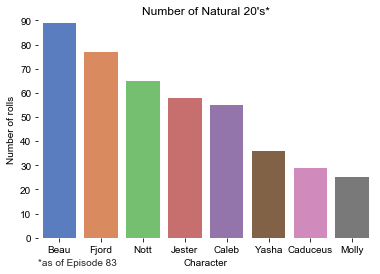

In [32]:
#Plot Nat20s
ax = sns.barplot('Character','Die Count', data=Nat20s, palette='muted')
ax.set(xlabel='Character', ylabel='Number of rolls', title="Number of Natural 20's*")
sns.set_style("whitegrid")
plt.ylim(0,90)
plt.annotate('*as of Episode 83', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
sns.despine(left=True, bottom=True)
plt.savefig('Nat20s.png')

# Create bar graph of how many Nat1s for each character

In [33]:
Nat1s=die_count[die_count['Natural Value'] == 1]
Nat1s

,Character,Natural Value,Die Count
17,Beau,1,68
39,Caduceus,1,11
50,Caleb,1,44
74,Fjord,1,46
89,Jester,1,57
116,Molly,1,14
132,Nott,1,63
153,Yasha,1,24


In [35]:
#order Nat1s in descending order
Nat1s=Nat1s.sort_values(['Die Count'], ascending=False)
Nat1s

,Character,Natural Value,Die Count
17,Beau,1,68
132,Nott,1,63
89,Jester,1,57
74,Fjord,1,46
50,Caleb,1,44
153,Yasha,1,24
116,Molly,1,14
39,Caduceus,1,11


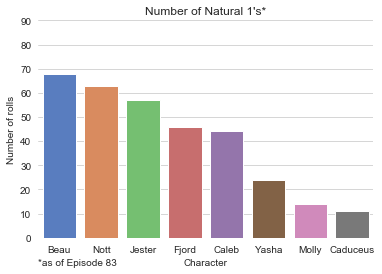

In [36]:
#Plot Nat1s
ax = sns.barplot('Character','Die Count', data=Nat1s, palette='muted')
ax.set(xlabel='Character', ylabel='Number of rolls', title="Number of Natural 1's*")
sns.set_style("whitegrid")
plt.ylim(0,90)
plt.annotate('*as of Episode 83', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
sns.despine(left=True, bottom=True)
plt.savefig('Nat1s.png')

# Create graph of normalized Nat20's per character by total roll count

In [37]:
Nat20_percent=roll_percent[roll_percent['Natural Value'] == 20]
Nat20_percent.head()

,Character,Natural Value,0,Total Rolls,Roll %
8,Beau,20,89,1685,5.281899
34,Caduceus,20,29,606,4.785479
42,Caleb,20,55,909,6.050605
64,Fjord,20,77,1156,6.660900
88,Jester,20,58,1139,5.092186


In [38]:
#sort the values by descending order
Nat20_percent=Nat20_percent.sort_values(['Roll %'], ascending=False)
Nat20_percent

,Character,Natural Value,0,Total Rolls,Roll %
64,Fjord,20,77,1156,6.660900
102,Molly,20,25,387,6.459948
42,Caleb,20,55,909,6.050605
144,Yasha,20,36,623,5.778491
8,Beau,20,89,1685,5.281899
88,Jester,20,58,1139,5.092186
130,Nott,20,65,1345,4.832714
34,Caduceus,20,29,606,4.785479


In [39]:
Nat20_percent.dtypes

Character         object
Natural Value      int64
0                  int64
Total Rolls        int64
Roll %           float64
dtype: object

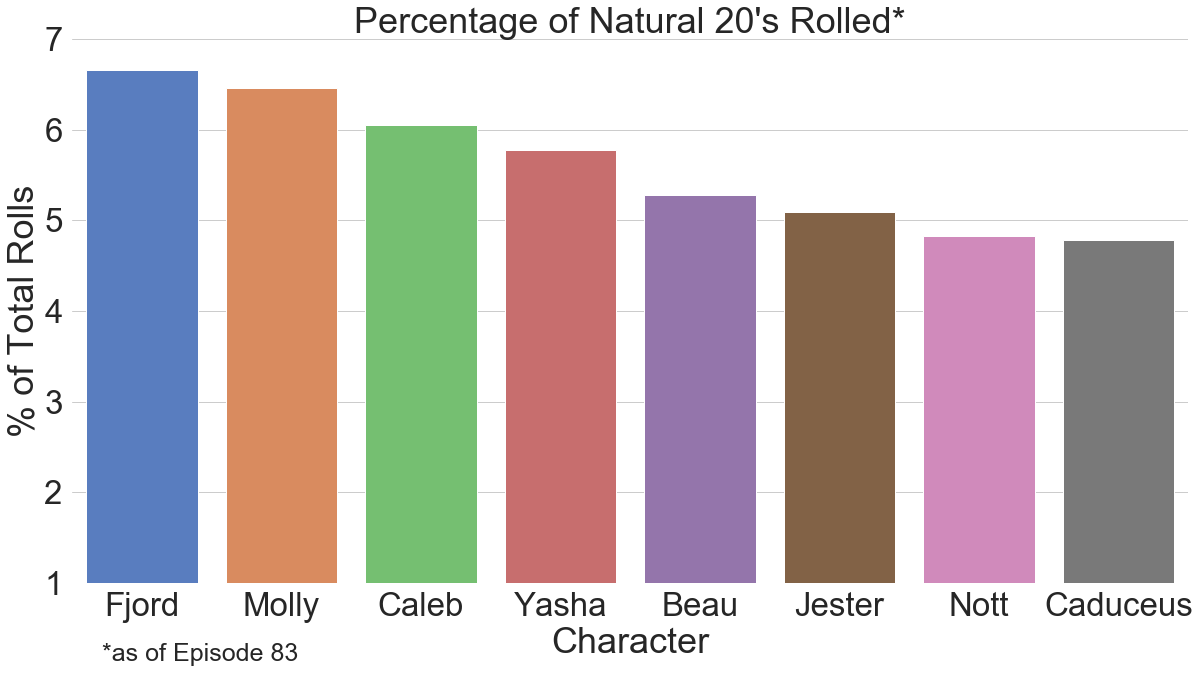

In [56]:
#Plot Nat20s %
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot('Character','Roll %', data=Nat20_percent, palette='muted')
ax.set(xlabel='Character', ylabel='% of Total Rolls', title="Percentage of Natural 20's Rolled*")

sns.despine(left=True, bottom=True)

plt.ylim(1,7)
plt.annotate('*as of Episode 83', (0,0), (30, -60), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=25)
#set font size
sns.set(font_scale=3)
plt.savefig('Nat20_percent.png')

# Create graph of normalized Nat1's per character by total roll count


In [59]:
Nat1_percent=roll_percent[roll_percent['Natural Value'] == 1]
Nat1_percent.head()

,Character,Natural Value,0,Total Rolls,Roll %
17,Beau,1,68,1685,4.035608
39,Caduceus,1,11,606,1.815182
50,Caleb,1,44,909,4.840484
74,Fjord,1,46,1156,3.979239
89,Jester,1,57,1139,5.004390


In [60]:
#sort the values by descending order
Nat1_percent=Nat1_percent.sort_values(['Roll %'], ascending=False)
Nat1_percent

,Character,Natural Value,0,Total Rolls,Roll %
89,Jester,1,57,1139,5.004390
50,Caleb,1,44,909,4.840484
132,Nott,1,63,1345,4.684015
17,Beau,1,68,1685,4.035608
74,Fjord,1,46,1156,3.979239
153,Yasha,1,24,623,3.852327
116,Molly,1,14,387,3.617571
39,Caduceus,1,11,606,1.815182


In [45]:
#Plot Nat1s %
ax = sns.barplot('Character','Roll %', data=Nat1_percent, palette='muted')
ax.set(xlabel='Character', ylabel='% of Total Rolls', title="Percentage of Natural 1's Rolled*")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.ylim(1,7)
plt.annotate('*as of Episode 83', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('Nat1_percent.png')

NameError: name 'Nat1_percent' is not defined

# Group graphs combining Nat20s and 1s for percent rolled out of total rolls

In [66]:
combined_percent=roll_percent[roll_percent['Natural Value'].isin([1,20])]
combined_percent

,Character,Natural Value,0,Total Rolls,Roll %
8,Beau,20,89,1685,5.281899
17,Beau,1,68,1685,4.035608
34,Caduceus,20,29,606,4.785479
39,Caduceus,1,11,606,1.815182
42,Caleb,20,55,909,6.050605
50,Caleb,1,44,909,4.840484
64,Fjord,20,77,1156,6.660900
74,Fjord,1,46,1156,3.979239
88,Jester,20,58,1139,5.092186
89,Jester,1,57,1139,5.004390


In [67]:
#sort the values by descending order
combined_percent=combined_percent.sort_values(['Roll %'], ascending=False)
combined_percent

,Character,Natural Value,0,Total Rolls,Roll %
64,Fjord,20,77,1156,6.660900
102,Molly,20,25,387,6.459948
42,Caleb,20,55,909,6.050605
144,Yasha,20,36,623,5.778491
8,Beau,20,89,1685,5.281899
88,Jester,20,58,1139,5.092186
89,Jester,1,57,1139,5.004390
50,Caleb,1,44,909,4.840484
130,Nott,20,65,1345,4.832714
34,Caduceus,20,29,606,4.785479


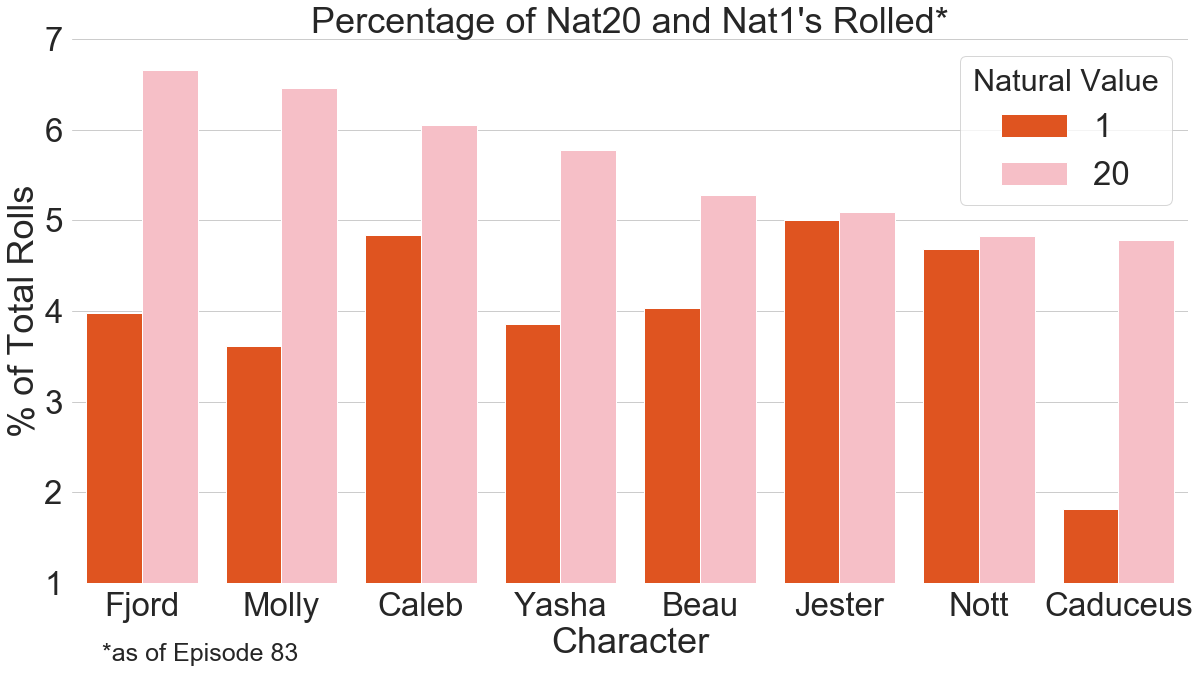

In [111]:
# Create an array with the colors you want to use
colors = ["orangered", "lightpink"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#set figure size
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

#Plot combined percentages %
ax = sns.barplot(x='Character',y='Roll %', hue='Natural Value', data=combined_percent)
ax.set(xlabel='Character', ylabel='% of Total Rolls', title="Percentage of Nat20 and Nat1's Rolled*")

sns.despine(left=True, bottom=True)
plt.ylim(1,7)

#footnote on how recent the graph is
plt.annotate('*as of Episode 83', (0,0), (30, -60), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=25)
#set font size
sns.set(font_scale=3)

#save figure
plt.savefig('Combined_percent.png')

# Calculate Killing Blows per Character

In [47]:
#drop nas to make it easier to search for strings in Notes column
HDYWTDT_DF=main_charactersDF.dropna(subset=['Notes'])
HDYWTDT_DF.head()

,Episode,Time,Character,Type of Roll,Total Value,Natural Value,Crit?,Damage Dealt,# Kills,Notes,Episode No
16,C2E001,1:08:52,Jester,Other,5,5,NaN,NaN,NaN,Crick Queen's Call,001
17,C2E001,1:08:52,Jester,Other,5,5,NaN,NaN,NaN,Crick Queen's Call,001
18,C2E001,1:08:52,Jester,Other,5,5,NaN,NaN,NaN,Crick Queen's Call,001
29,C2E001,1:57:57,Yasha,Investigation,12,12,NaN,NaN,NaN,With advantage,001
39,C2E001,2:26:51,Jester,Spell Attack,16,11,NaN,NaN,NaN,Guiding Bolt,001


In [48]:
#drop any columns that don't list HDYWTDT
HDYWTDT_DF=HDYWTDT_DF[HDYWTDT_DF['Notes'].str.contains('HDYWTDT')]
HDYWTDT_DF.head()

,Episode,Time,Character,Type of Roll,Total Value,Natural Value,Crit?,Damage Dealt,# Kills,Notes,Episode No
75,C2E001,2:54:30,Beau,Damage,13,13,NaN,13 to Creature 2,1,HDYWTDT,001
200,C2E003,0:32:34,Nott,Attack,Nat20,20,Y,NaN,1,Hand Crossbow (HDYWTDT),003
312,C2E003,3:27:30,Fjord,Damage,14,14,NaN,14 to Kylre,1,HDYWTDT,003
767,C2E007,2:17:23,Nott,Damage,15,15,NaN,15 to Pack Lord,0.5,HDYWTDT,007
768,C2E007,2:17:24,Jester,Damage,4,4,NaN,4 to Pack Lord,0.5,HDYWTDT,007


In [49]:
HDYWTDT_count=HDYWTDT_DF['Character'].value_counts()
print(HDYWTDT_count)
print(type(HDYWTDT_count))

Fjord       11
Jester       9
Beau         8
Nott         7
Molly        7
Yasha        5
Caleb        4
Caduceus     4
Name: Character, dtype: int64
<class 'pandas.core.series.Series'>


In [50]:
#reset index
HDYWTDT_count=HDYWTDT_count.reset_index()
HDYWTDT_count.head()

,index,Character
0,Fjord,11
1,Jester,9
2,Beau,8
3,Nott,7
4,Molly,7


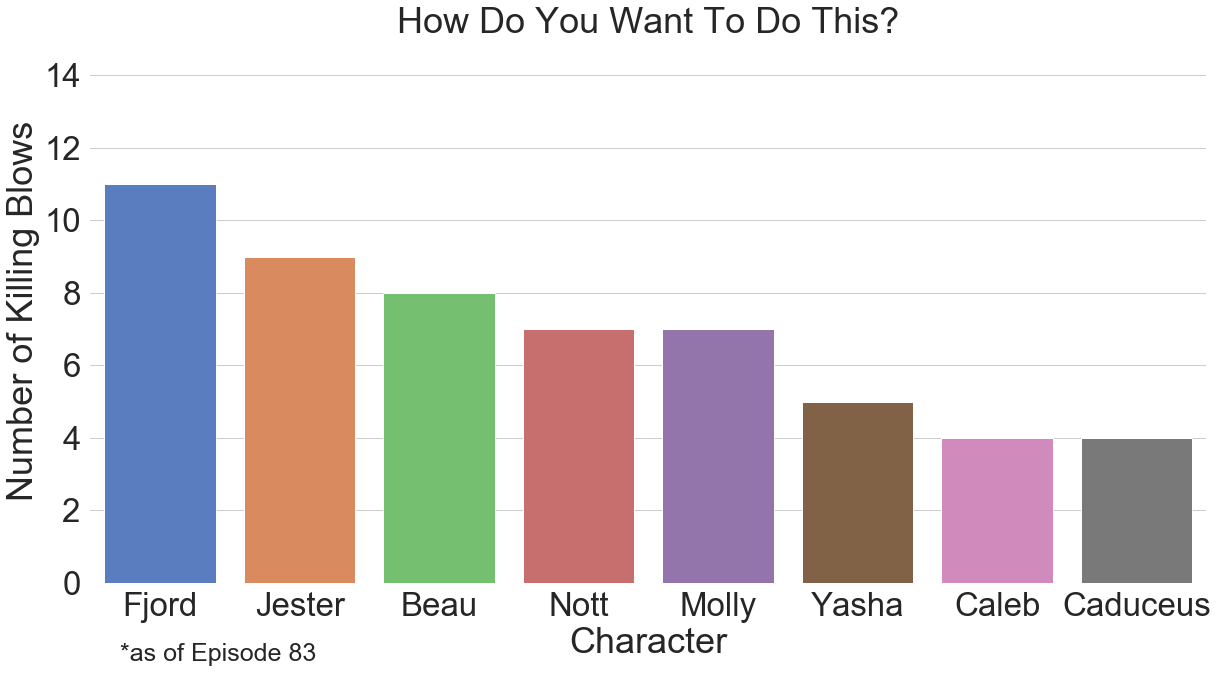

In [64]:
#Plot Killing Blows %
#reset graph style from last run
sns.set()
sns.set(font_scale=3)

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
ax = sns.barplot(x='index', y='Character', data=HDYWTDT_count, palette='muted')
ax.set(xlabel='Character', ylabel='Number of Killing Blows', title="How Do You Want To Do This?")

sns.despine(left=True, bottom=True)
plt.ylim(0,15)

plt.annotate('*as of Episode 83', (0,0), (30, -60), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=25)
plt.savefig('HDYWTDT_count.png')

# Explore Types of Rolls

In [178]:
cleanrolls=main_charactersDF
cleanrolls['Type of Roll'].value_counts()

Attack               1205
Damage               1125
Perception            957
Stealth               626
Initiative            519
Investigation         421
Spell Attack          415
Constitution Save     222
Wisdom Save           185
Persuasion            161
Deception             152
Dexterity Save        150
Athletics             150
Healing               132
Insight               126
Acrobatics            119
Strength              112
Intelligence          104
Other                  79
History                72
Thieves' Tools         69
Sleight of Hand        67
Arcana                 66
Dexterity              64
Survival               60
Religion               54
Intimidation           47
Medicine               46
Animal Handling        41
Wisdom                 41
Nature                 38
Strength Save          32
Constitution           31
Hit Points             31
Performance            24
Death Save             16
Blink                  14
Deflect Missiles       13
Charisma    

In [179]:
#remove Check from the roll types
banned=['Check']
f = lambda x: ' '.join([item for item in x.split() if item not in banned])
cleanrolls["Type of Roll"] = cleanrolls["Type of Roll"].apply(f)
cleanrolls['Type of Roll'].value_counts()

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Attack               1205
Damage               1125
Perception            957
Stealth               626
Initiative            519
Investigation         421
Spell Attack          415
Constitution Save     222
Wisdom Save           185
Persuasion            161
Deception             152
Dexterity Save        150
Athletics             150
Healing               132
Insight               126
Acrobatics            119
Strength              112
Intelligence          104
Other                  79
History                72
Thieves' Tools         69
Sleight of Hand        67
Arcana                 66
Dexterity              64
Survival               60
Religion               54
Intimidation           47
Medicine               46
Animal Handling        41
Wisdom                 41
Nature                 38
Strength Save          32
Constitution           31
Hit Points             31
Performance            24
Death Save             16
Blink                  14
Deflect Missiles       13
Charisma    

In [180]:
cleanrolls=cleanrolls.groupby('Character')['Type of Roll'].value_counts()
print(cleanrolls.head(25))


Character  Type of Roll     
Beau       Attack               517
           Damage               318
           Perception           167
           Stealth              100
           Investigation         82
           Initiative            79
           Acrobatics            46
           Other                 32
           Athletics             29
           Constitution Save     29
           Wisdom Save           29
           History               26
           Dexterity Save        25
           Persuasion            25
           Insight               24
           Deception             16
           Survival              14
           Deflect Missiles      13
           Dexterity             13
           Strength              12
           Intelligence          11
           Intimidation          11
           Animal Handling        9
           Arcana                 9
           Religion               9
Name: Type of Roll, dtype: int64


In [181]:
cleanrolls=pd.DataFrame(cleanrolls)
cleanrolls.head()

Type of Roll
Character Type of Roll               
Beau      Attack                  517
          Damage                  318
          Perception              167
          Stealth                 100
          Investigation            82

In [182]:
cleanrolls=cleanrolls.rename(columns={'Type of Roll':'Count'})
cleanrolls=cleanrolls.reset_index()
cleanrolls.head()

,Character,Type of Roll,Count
0,Beau,Attack,517
1,Beau,Damage,318
2,Beau,Perception,167
3,Beau,Stealth,100
4,Beau,Investigation,82


# Graph presuasion and deception

In [191]:
per_decp=cleanrolls[cleanrolls['Type of Roll'].isin(['Persuasion','Deception'])]
per_decp

,Character,Type of Roll,Count
13,Beau,Persuasion,25
15,Beau,Deception,16
46,Caduceus,Persuasion,16
53,Caduceus,Deception,10
82,Caleb,Persuasion,25
86,Caleb,Deception,15
119,Fjord,Deception,38
120,Fjord,Persuasion,31
156,Jester,Deception,41
158,Jester,Persuasion,35


In [192]:
#sort the values by descending order
per_decp=per_decp.sort_values(['Count'], ascending=False)
per_decp

,Character,Type of Roll,Count
156,Jester,Deception,41
119,Fjord,Deception,38
158,Jester,Persuasion,35
120,Fjord,Persuasion,31
13,Beau,Persuasion,25
82,Caleb,Persuasion,25
243,Nott,Deception,19
244,Nott,Persuasion,17
15,Beau,Deception,16
46,Caduceus,Persuasion,16


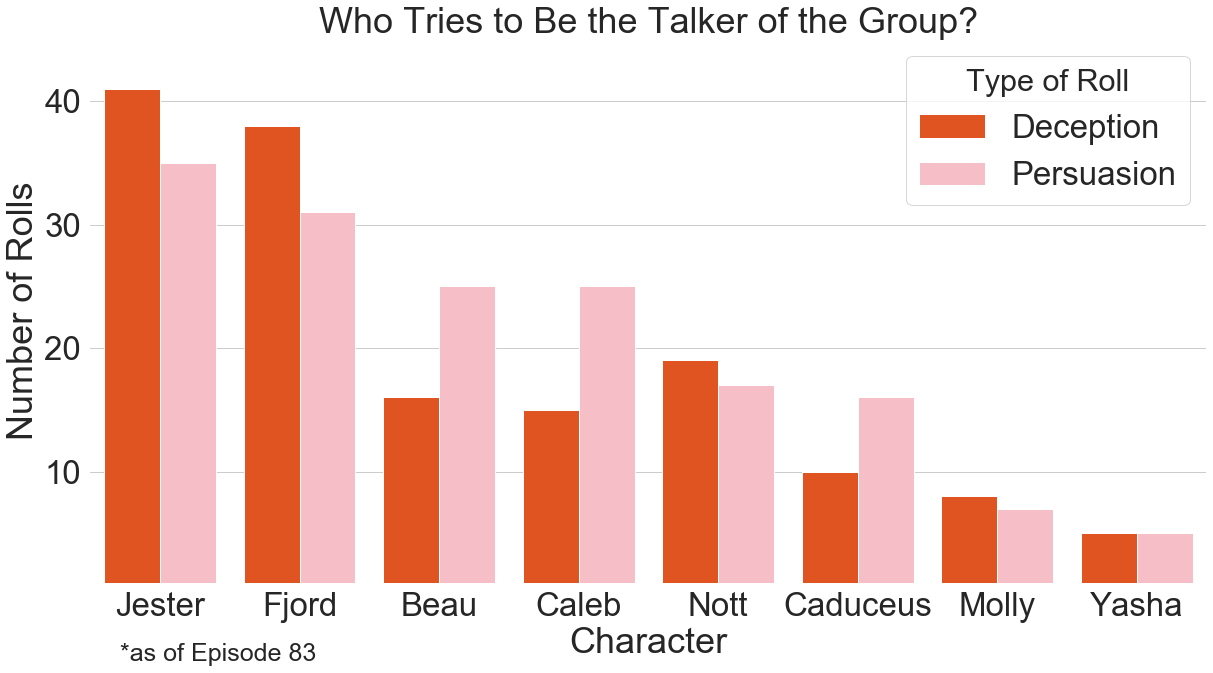

In [200]:
#Plot Killing Blows %
#reset graph style from last run
sns.set()
#set font size
sns.set(font_scale=3)
# Create an array with the colors you want to use
colors = ["orangered", "lightpink"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#set figure size
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

#Plot combined percentages %
ax = sns.barplot(x='Character',y='Count', hue='Type of Roll', data=per_decp)
ax.set(xlabel='Character', ylabel='Number of Rolls', title="Who Tries to Be the Talker of the Group?")

sns.despine(left=True, bottom=True)
plt.ylim(1,45)

#footnote on how recent the graph is
plt.annotate('*as of Episode 83', (0,0), (30, -60), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=25)

#save figure
plt.savefig('Persuasion_deception.png')

# Who Makes the Most Saving Throws?

In [34]:
cleanrolls=main_charactersDF
saves=cleanrolls[cleanrolls['Type of Roll'].str.contains("Save")]
saves['Type of Roll'].value_counts()

Constitution Save    222
Wisdom Save          185
Dexterity Save       150
Strength Save         32
Death Save            16
Charisma Save         12
Consitution Save       1
Name: Type of Roll, dtype: int64

In [35]:
type(saves)

pandas.core.frame.DataFrame

In [36]:
saves.head()

,Episode,Time,Character,Type of Roll,Total Value,Natural Value,Crit?,Damage Dealt,# Kills,Notes,Episode No
23,C2E001,1:20:25,Nott,Constitution Save,12,10,NaN,NaN,NaN,NaN,001
51,C2E001,2:36:28,Caleb,Dexterity Save,17,16,NaN,NaN,NaN,NaN,001
52,C2E001,2:36:28,Nott,Dexterity Save,15,9,NaN,NaN,NaN,NaN,001
264,C2E003,2:49:32,Nott,Wisdom Save,15,15,NaN,NaN,NaN,Against Toya's singing,003
265,C2E003,2:49:35,Beau,Wisdom Save,15,12,NaN,NaN,NaN,Against Toya's singing,003


In [37]:
#convert all saves into just save
saves['Type of Roll']= 'Save'
saves.head()

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Episode,Time,Character,Type of Roll,Total Value,Natural Value,Crit?,Damage Dealt,# Kills,Notes,Episode No
23,C2E001,1:20:25,Nott,Save,12,10,NaN,NaN,NaN,NaN,001
51,C2E001,2:36:28,Caleb,Save,17,16,NaN,NaN,NaN,NaN,001
52,C2E001,2:36:28,Nott,Save,15,9,NaN,NaN,NaN,NaN,001
264,C2E003,2:49:32,Nott,Save,15,15,NaN,NaN,NaN,Against Toya's singing,003
265,C2E003,2:49:35,Beau,Save,15,12,NaN,NaN,NaN,Against Toya's singing,003


In [38]:
#count number of saves per character
saves=saves['Character'].value_counts()
saves.head()

Caleb    100
Yasha     96
Beau      94
Fjord     85
Nott      83
Name: Character, dtype: int64

In [39]:
#convert back to dataframe to graph
saves=pd.DataFrame(saves)
saves.head()

,Character
Caleb,100
Yasha,96
Beau,94
Fjord,85
Nott,83


In [40]:
#clean up dataframe
saves=saves.rename(columns={'Character':'Count'})
saves=saves.reset_index()
saves.head()

,index,Count
0,Caleb,100
1,Yasha,96
2,Beau,94
3,Fjord,85
4,Nott,83


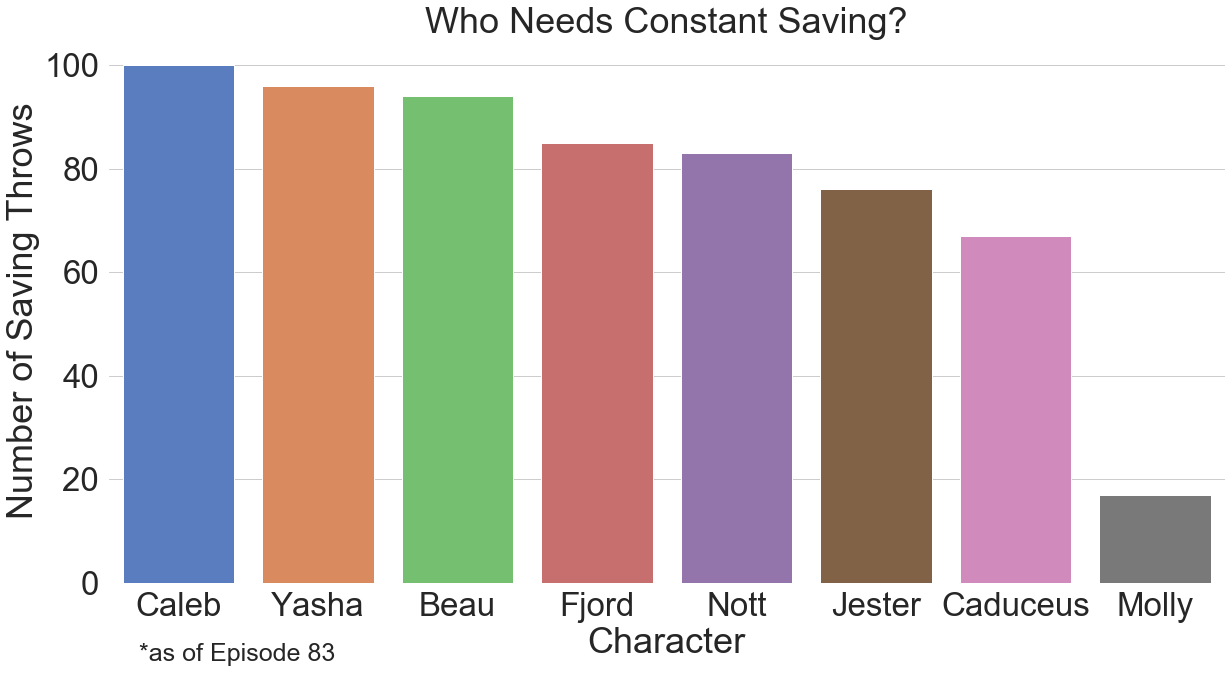

In [46]:
#Plot Number of Saving Throws per Main Character
#reset graph style from last run
sns.set()
sns.set(font_scale=3)

#set figure size
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

ax = sns.barplot(x='index', y='Count', data=saves, palette='muted')
ax.set(xlabel='Character', ylabel='Number of Saving Throws', title="Who Needs Constant Saving?")

sns.despine(left=True, bottom=True)
plt.ylim(0,105)

plt.annotate('*as of Episode 83', (0,0), (30, -60), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=25)
plt.savefig('saves.png')